1. 1차원데이터분석

2. 변수종류파악( 수치형/ 범주형/ 시간형)

3. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

4. 시각화

- 도수분포표/ 히스토그램/ 상자그림


1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

- 산점도/ 회귀직선/ 히트맵

항공사별 지연율 데이터 (총 33,468건)

주요 컬럼:

pct_carrier_delay: 항공사 내부 사정으로 인한 지연 비율
pct_atc_delay: 항공 교통 통제로 인한 지연 비율
pct_weather_delay: 기상 조건으로 인한 지연 비율
airline: 항공사명

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/airline_stats.csv')
#기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [3]:
# 데이터 샘플 보기
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [4]:
# 결측치 개수
missing_count = df.isnull().sum()

# 전체 대비 결측치 비율(%)
missing_ratio = (missing_count / len(df)) * 100

# 결측치 요약표 출력
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio
}).sort_values(by='Missing Count', ascending=False)

missing_df[missing_df['Missing Count'] >= 0]

,Missing Count,Missing Ratio (%)
pct_carrier_delay,28,0.083662
pct_atc_delay,28,0.083662
pct_weather_delay,28,0.083662
airline,0,0.000000


In [5]:
#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['axes.unicode_minus'] = False

In [6]:
# 결측치 제거하기  
df1 = df.dropna()
df1.isnull().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

In [7]:
# 수치형 변수의 최대/최소/대표값
df1.select_dtypes(include='number').describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [8]:
#범주형 변수의 값 목록 
airline_counts = df1['airline'].value_counts()
airline_counts

airline
Delta        9095
American     5723
Southwest    5584
United       5414
Alaska       3851
Jet Blue     3773
Name: count, dtype: int64

In [9]:
#항공사별로 기술통계 비교
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

3. 탐색적 데이터 분석 (EDA)

3.1 변수별 분포
- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인

3.2 항공사별 비교
- 항공사별 평균 지연율 비교 (막대그래프)
- 항공사별 상자그림 비교

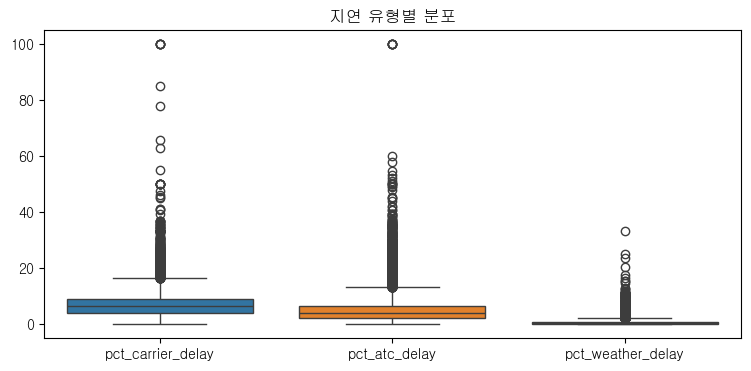

In [10]:
# 변수별 분포 상자그림(boxplot)
import seaborn as sns

plt.figure(figsize=(9, 4))
sns.boxplot(data=df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']])
plt.title('지연 유형별 분포')
plt.show()




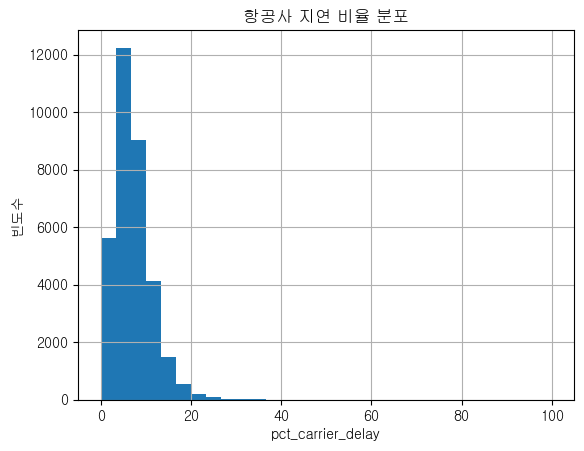

In [11]:
df['pct_carrier_delay'].hist(bins=30)
plt.title('항공사 지연 비율 분포')
plt.xlabel('pct_carrier_delay')
plt.ylabel('빈도수')
plt.show()

In [12]:
# 3.2 항공사별 비교 - 항공사별 평균 지연율 비교 (막대그래프)

# 항공사별 평균 지연율 계산
airline_delay_mean = df.groupby('airline')[[
    'pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'
]].mean()
airline_delay_mean



,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


In [13]:
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

pct_carrier_delay    7.041475
pct_atc_delay        5.089962
pct_weather_delay    0.684776
dtype: float64

: 항공사별 평균지연율과 전체 평균지연율을 비교


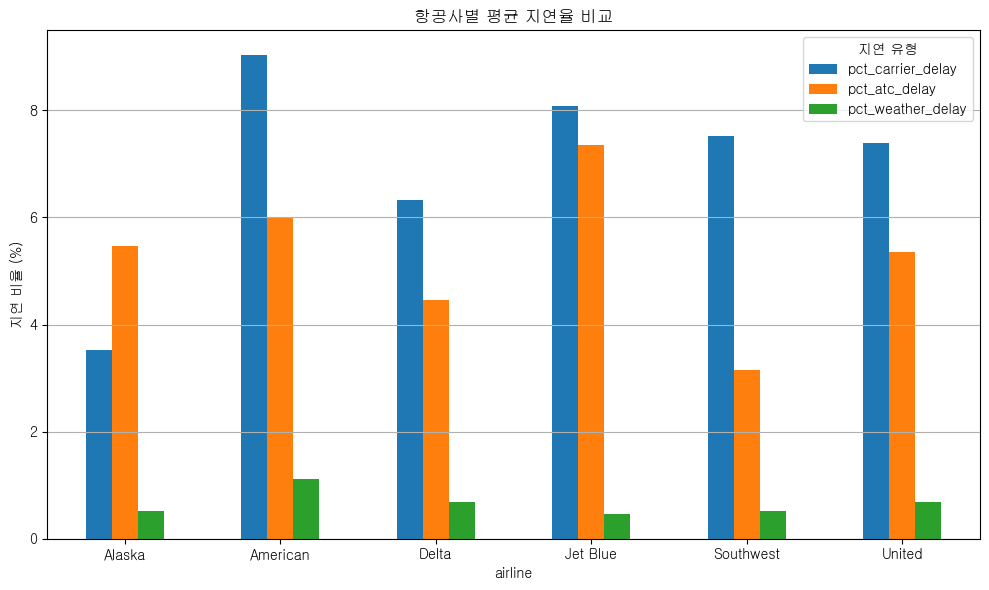

In [14]:
# 3.2 항공사별 비교 - 항공사별 평균 지연율 비교 (막대그래프)
# 시각화
airline_delay_mean.plot(kind='bar', figsize=(10, 6))
plt.title("항공사별 평균 지연율 비교")
plt.ylabel("지연 비율 (%)")
plt.xticks(rotation=0)
plt.legend(title="지연 유형")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


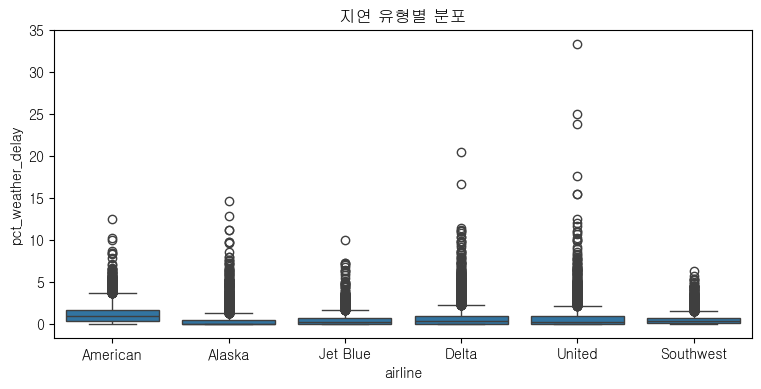

In [15]:
# 항공사별 날씨 지연율
import seaborn as sns

plt.figure(figsize=(9, 4))
sns.boxplot(x='airline', y='pct_weather_delay', data=df1)
plt.title('지연 유형별 분포')
plt.show()


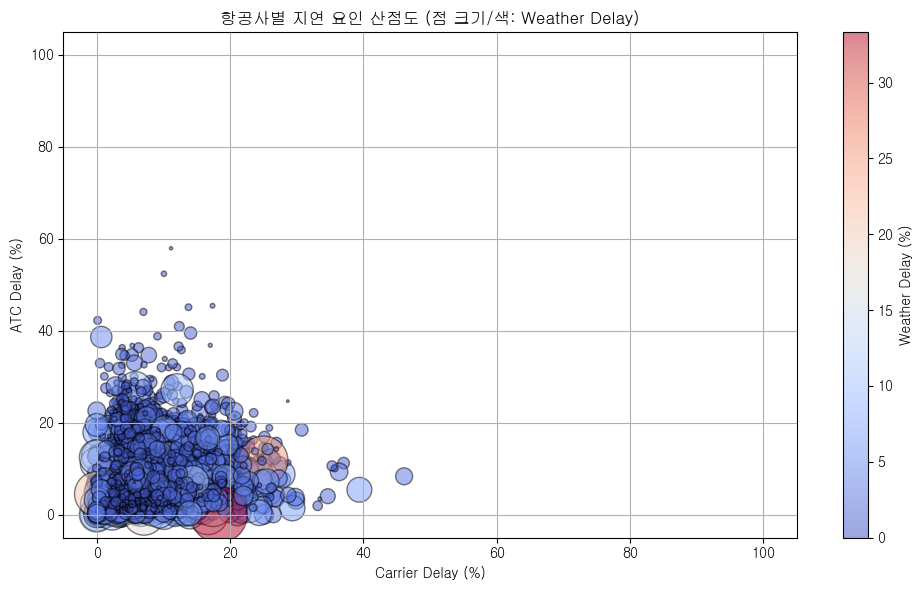

In [16]:
import matplotlib.pyplot as plt

df1_sample = df1.sample(n=200, random_state=42)
# fig & axes 생성

fig = plt.figure(figsize=(10, 6))
axes = fig.add_subplot(1, 1, 1)

# 산점도: x = carrier, y = atc, 점 크기/색상 = weather
scatter = axes.scatter(
    df1['pct_carrier_delay'],
    df1['pct_atc_delay'],
    s=df1['pct_weather_delay'] * 50,  # 점 크기로 weather 지연률 반영
    c=df1['pct_weather_delay'],       # 색상도 weather 지연률로
    cmap='coolwarm',
    alpha=0.5,
    edgecolors='black'
)


# 축 설정
axes.set_xlabel('Carrier Delay (%)')
axes.set_ylabel('ATC Delay (%)')
axes.set_title('항공사별 지연 요인 산점도 (점 크기/색: Weather Delay)')

# 컬러바 추가
plt.colorbar(scatter, label='Weather Delay (%)')

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()



인사이트 도출
- 운항사 지연률이 높은 항공사는 누구인가?
- 항공사별로 어떤 지연 요인이 더 영향을 미치는가?
- 정책적 개선안 제시

결론 및 제언
- 핵심 요약: 데이터 기반 의사결정 가능
- 데이터 활용 방안 및 후속 분석 방향